In [1]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization 
from tensorflow.keras import utils 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import Callback

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing

import time

%matplotlib inline

## Aufgabe 1

In [2]:
df = pd.read_csv("sonar.csv", header=None)
df.head() 

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
print(df.shape)

(208, 61)


In [4]:
dataset = df.values

X = dataset[:,:-1].astype(float)
Y = dataset[:,-1]

Y[Y=='R']='0'
Y[Y=='M']='1'
Y = Y.astype(int)

print(X.shape)
print(Y.shape)
print(Y)

(208, 60)
(208,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Erstellung eines Trainings-, Validierungs- und Test Dataset

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, shuffle=True)

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(176, 60)
(32, 60)
(176,)
(32,)


In [7]:
def createModel():
    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu'))
    model.add(Dense(30,  activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
    
    return model

In [8]:
model = createModel()

history = model.fit(X_train,         
          y_train,         
          batch_size=8,    
          epochs=100,
          validation_split=0.2,
          verbose=1) 

Epoch 1/100
18/18 [==============================] - 0s 11ms/step - loss: 0.6908 - accuracy: 0.5500 - val_loss: 0.7014 - val_accuracy: 0.4722
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.5571 - val_loss: 0.6829 - val_accuracy: 0.5000
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.5786 - val_loss: 0.6688 - val_accuracy: 0.5833
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.6571 - val_loss: 0.6471 - val_accuracy: 0.6111
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.7000 - val_loss: 0.6214 - val_accuracy: 0.6944
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.7214 - val_loss: 0.6099 - val_accuracy: 0.6667
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.7429 - val_loss: 0.5866 - val_accuracy: 0.8056
Epoch 8/100


18/18 [==============================] - 0s 2ms/step - loss: 0.1455 - accuracy: 0.9929 - val_loss: 0.4193 - val_accuracy: 0.8056
Epoch 59/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1387 - accuracy: 0.9714 - val_loss: 0.3355 - val_accuracy: 0.9444
Epoch 60/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1548 - accuracy: 0.9357 - val_loss: 0.4097 - val_accuracy: 0.8056
Epoch 61/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9643 - val_loss: 0.3937 - val_accuracy: 0.8056
Epoch 62/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1690 - accuracy: 0.9429 - val_loss: 0.4144 - val_accuracy: 0.8056
Epoch 63/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.9286 - val_loss: 0.5524 - val_accuracy: 0.8056
Epoch 64/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9429 - val_loss: 0.5365 - val_accuracy: 0.8056
Epoch 65/100
18/18 

In [9]:
def plot_train_history(history, loss='loss', metrics='accuracy'):
    # Accuracy ---------
    plt.figure(figsize=(8,6))

    plt.plot(history.history[metrics], 
         label='accuracy Train Data')

    plt.plot(history.history['val_' + metrics], 
         label='accuracy Validation Data')
    plt.xlabel('Epoch')
    plt.ylabel(metrics)

    plt.legend()
    plt.show()
    
    # Loss------------
    plt.figure(figsize=(8,6))
    plt.plot(history.history[loss], 
         label='loss Train Data')
    plt.plot(history.history['val_' + loss], 
         label='loss Validation Data')
    plt.xlabel('Epoch')
    plt.ylabel(loss)
    plt.legend()
    plt.show()

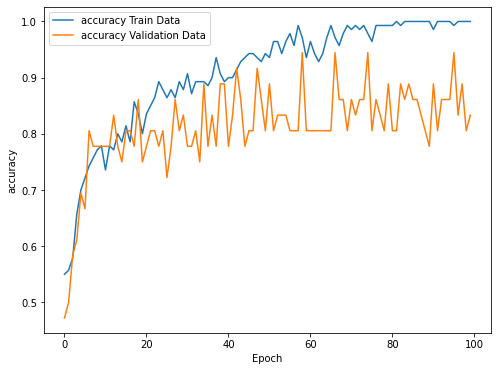

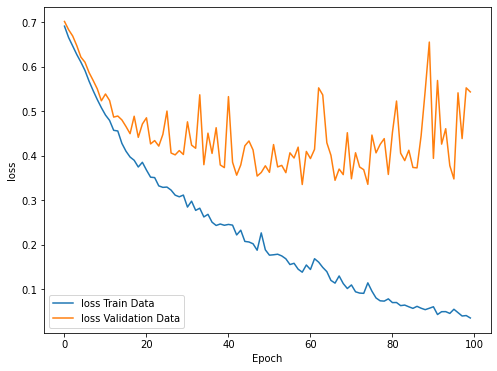

In [10]:
plot_train_history(history)

In [11]:
class myCallback(Callback): 
    def on_epoch_end(self, epoch, logs={}): 
       # print(logs)
        if (logs.get('accuracy') > ACCURACY_THRESHOLD) and (logs.get('val_accuracy') > VAL_ACCURACY_THRESHOLD):   
            print("\nWe have reached %2.2f%% accuracy, so we will stopping training." %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

Epoch 1/200
18/18 [==============================] - 0s 11ms/step - loss: 0.9224 - accuracy: 0.4286 - val_loss: 0.6872 - val_accuracy: 0.5278
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 0.7580 - accuracy: 0.5786 - val_loss: 0.6726 - val_accuracy: 0.6944
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.6000 - val_loss: 0.6591 - val_accuracy: 0.7500
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6247 - accuracy: 0.6214 - val_loss: 0.6517 - val_accuracy: 0.7222
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6046 - accuracy: 0.7214 - val_loss: 0.6415 - val_accuracy: 0.7778
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.6143 - val_loss: 0.6314 - val_accuracy: 0.8056
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.6786 - val_loss: 0.6331 - val_accuracy: 0.7222
Epoch 8/200


Epoch 59/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2695 - accuracy: 0.9286 - val_loss: 0.2811 - val_accuracy: 0.8333
Epoch 60/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8786 - val_loss: 0.2602 - val_accuracy: 0.8611
Epoch 61/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8571 - val_loss: 0.2595 - val_accuracy: 0.8333
Epoch 62/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2219 - accuracy: 0.9286 - val_loss: 0.2392 - val_accuracy: 0.8611
Epoch 63/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8500 - val_loss: 0.2405 - val_accuracy: 0.8889
Epoch 64/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.9071 - val_loss: 0.2359 - val_accuracy: 0.8889
Epoch 65/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8286 - val_loss: 0.2350 - val_accuracy: 0.9167
Epoch 

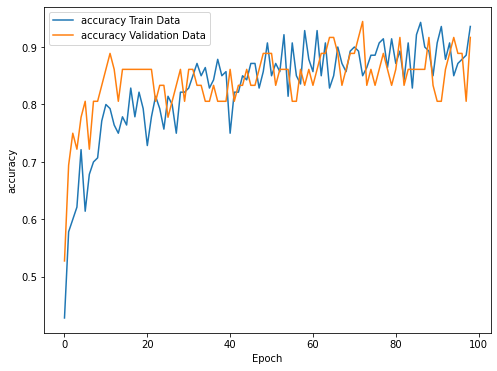

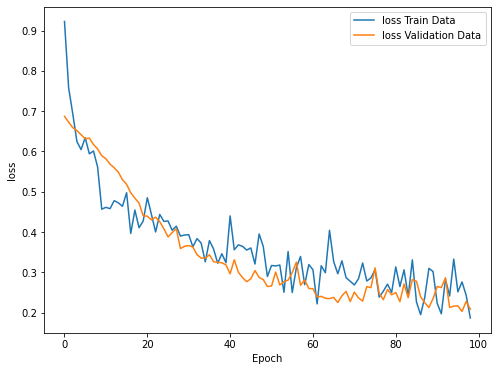

In [12]:
ACCURACY_THRESHOLD = 0.92
VAL_ACCURACY_THRESHOLD = 0.91

model = Sequential()
model.add(Dense(80, input_dim=60, activation='relu')) #60
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(30, activation='relu')) #30
#model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))
    
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.005, nesterov=True), metrics=['accuracy'])

#model.get_weights()

callbacks = myCallback()

history = model.fit(X_train,         
          y_train,         
          batch_size=8,    
          epochs=200,
          validation_split=0.2, #0.25
          verbose=1,
          callbacks=[callbacks]) 
plot_train_history(history)

In [13]:
#model.save_weights('model'+str(time.time())+'.h5' )

In [14]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.8438


[0.3627828359603882, 0.84375]

## Aufgabe 2 (Vorhersage der Autopreise)

In [15]:
cars_df = pd.read_csv('cars_new.csv', sep=',')
cars_df.head()

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
0,kia,cerato,996000,2018,28000,седан,автомат,бензин,2.0,150.0
1,daewoo,nexia 1 поколение [2-й рестайлинг],140200,2012,60500,седан,механика,бензин,1.5,80.0
2,suzuki,jimny 3 поколение [рестайлинг],750000,2011,29000,внедорожник,автомат,бензин,1.3,85.0
3,bmw,x1 18 e84 [рестайлинг],970000,2014,49500,кроссовер,автомат,бензин,2.0,150.0
4,chevrolet,lacetti 1 поколение,205000,2007,151445,седан,механика,бензин,1.4,95.0


In [16]:
print(cars_df.shape)

(70119, 10)


In [17]:
cars_df.isnull().sum()

mark       0
model      0
price      0
year       0
mileage    0
body       3
kpp        4
fuel       0
volume     0
power      0
dtype: int64

In [18]:
print(cars_df['body'].unique())
print(cars_df['kpp'].unique())

['седан' 'внедорожник' 'кроссовер' 'хетчбэк' 'универсал' 'минивэн'
 'лифтбэк' 'купе' 'микроавтобус' 'пикап' 'кабриолет' 'хардтоп' 'родстер'
 'тарга' nan 'лимузин' 'фастбэк']
['автомат' 'механика' 'робот' 'вариатор' nan]


In [19]:
values = {"body": 'unknown', "kpp": 'unknown'}
cars_df.fillna(value=values, inplace=True)

In [20]:
vocab, indexes = np.unique(cars_df['mark'], return_inverse=True)

In [21]:
vocab

array(['audi', 'bmw', 'chery', 'chevrolet', 'daewoo', 'ford', 'honda',
       'hyundai', 'kia', 'mazda', 'mercedes-benz', 'mitsubishi', 'nissan',
       'opel', 'peugeot', 'renault', 'skoda', 'subaru', 'suzuki',
       'toyota', 'volkswagen'], dtype=object)

In [22]:
indexes.shape

(70119,)

In [23]:
utils.to_categorical(indexes.reshape(-1, 1), num_classes = len(vocab))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
# Funktion zur Konvertierung einer Datenspalte aus einem Pandas DataFrame in OneHot
def labelsToOneHot(column): 
    #Ein Array mit eindeutigen Werten für die Spalte und die gleiche Spalte, aber als Indizes von Werten aus dem Dictionary
    vocab, indexes = np.unique(cars_df[column], return_inverse=True) 
    # Indizes in One-Hot umwandeln
    oneHotData = utils.to_categorical(indexes.reshape(-1, 1), num_classes = len(vocab))
    
    # Rückgabe der Indizes in one-hot und einer Liste eindeutiger Werte
    return oneHotData, vocab.tolist() 

In [25]:
labelData = ['mark', 'model', 'body', 'kpp', 'fuel']
vocabulary = []
oneHot = []

for column in labelData:
    print(column)
    oneHotData, vocab = labelsToOneHot(column)
    vocabulary.append(vocab)
    oneHot.append(oneHotData)

mark
model
body
kpp
fuel


In [26]:
#Kombinieren alle Arrays zu einem.
oneHotArray = np.concatenate([i for i in oneHot], axis = 1) 

In [27]:
oneHotArray.shape

(70119, 3204)

In [28]:
for voc in vocabulary:
    print('Anzahl der eindeutigen Elemente in', labelData[vocabulary.index(voc)], ':', len(voc))

Anzahl der eindeutigen Elemente in mark : 21
Anzahl der eindeutigen Elemente in model : 3156
Anzahl der eindeutigen Elemente in body : 17
Anzahl der eindeutigen Elemente in kpp : 5
Anzahl der eindeutigen Elemente in fuel : 5


In [29]:
print(vocabulary[0]) 
lenmarks = len(vocabulary[0]) 

['audi', 'bmw', 'chery', 'chevrolet', 'daewoo', 'ford', 'honda', 'hyundai', 'kia', 'mazda', 'mercedes-benz', 'mitsubishi', 'nissan', 'opel', 'peugeot', 'renault', 'skoda', 'subaru', 'suzuki', 'toyota', 'volkswagen']


In [30]:
oneHotArray[100, :lenmarks]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float32)

In [31]:
np.argmax(oneHotArray[100, :lenmarks]) 

10

In [32]:
vocabulary[0][np.argmax(oneHotArray[100, :lenmarks])]

'mercedes-benz'

In [33]:
prices = np.array(cars_df['price'], dtype=np.float64)


years = preprocessing.scale(cars_df['year'])
mileages = preprocessing.scale(cars_df['mileage'])
volumes = preprocessing.scale(cars_df['volume'])
powers = preprocessing.scale(cars_df['power'])

In [34]:
round(years.mean(),3)

0.0

In [35]:
mileages.std()

1.0

In [36]:
type(years)
years.reshape(-1, 1).shape

(70119, 1)

In [37]:
X = np.concatenate(
    [years.reshape(-1, 1), mileages.reshape(-1, 1), volumes.reshape(-1, 1), powers.reshape(-1, 1), oneHotArray],
    axis = 1) 

In [38]:
X.shape

(70119, 3208)

In [39]:
type(prices)
prices.shape

(70119,)

In [40]:
y = prices

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(56095, 3208)
(56095,)
(14024, 3208)
(14024,)


In [43]:
# Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

In [44]:
y_train_scaled.shape

(56095,)

In [45]:
print(y_train[:10])
print(y_train_scaled[:10])

[480000. 250000. 175000. 150000. 490000. 525000. 290000. 150000. 529000.
  95000.]
[-0.07764972 -0.45536525 -0.57853336 -0.6195894  -0.0612273  -0.00374885
 -0.38967559 -0.6195894   0.00282011 -0.70991268]


In [46]:
type(X_train)

numpy.ndarray

In [47]:
y_train_scaled.mean()

6.333387429896605e-17

### FCNN Model 

In [56]:
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(100, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(lr=0.0001), loss='mse', metrics='mae')

history = model.fit(X_train,         
          y_train_scaled,         
          batch_size=32,    
          epochs=10,
          validation_split=0.15,
          verbose=1) 


Epoch 1/10
1490/1490 [==============================] - 38s 25ms/step - loss: 0.1961 - mae: 0.1743 - val_loss: 0.2527 - val_mae: 0.1271
Epoch 2/10
1490/1490 [==============================] - 33s 22ms/step - loss: 0.1048 - mae: 0.1300 - val_loss: 0.2394 - val_mae: 0.1264
Epoch 3/10
1490/1490 [==============================] - 34s 23ms/step - loss: 0.0852 - mae: 0.1209 - val_loss: 0.2151 - val_mae: 0.1221
Epoch 4/10
1490/1490 [==============================] - 30s 20ms/step - loss: 0.0754 - mae: 0.1164 - val_loss: 0.2117 - val_mae: 0.1187
Epoch 5/10
1490/1490 [==============================] - 36s 24ms/step - loss: 0.0655 - mae: 0.1123 - val_loss: 0.2033 - val_mae: 0.1155
Epoch 6/10
1490/1490 [==============================] - 28s 19ms/step - loss: 0.0589 - mae: 0.1103 - val_loss: 0.1988 - val_mae: 0.1131
Epoch 7/10
1490/1490 [==============================] - 29s 20ms/step - loss: 0.0545 - mae: 0.1071 - val_loss: 0.2050 - val_mae: 0.1133
Epoch 8/10
1490/1490 [==========================

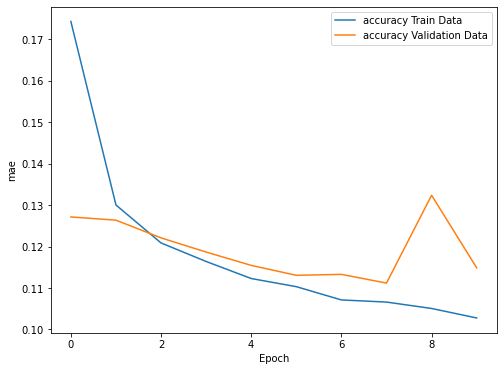

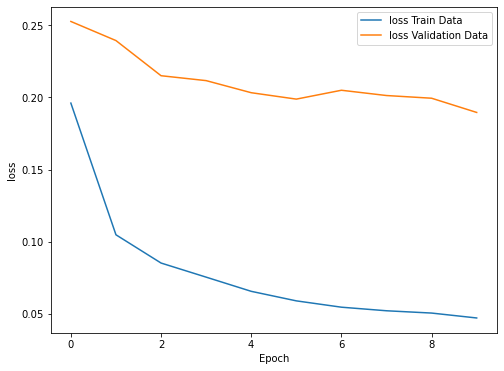

In [57]:
plot_train_history(history, loss='loss', metrics='mae')

In [58]:
predict = model.predict(X_test)

In [59]:
predict = y_scaler.inverse_transform(predict).flatten()

In [60]:
predict

array([1149746.6 ,  448804.34,  474139.22, ...,  106638.05,  691111.75,
        456501.12], dtype=float32)

In [61]:
mean_delta = np.mean(abs(predict - y_test))
mean_price = np.mean(y_test)
print('Mean Error: ', round(mean_delta))
print('Mean Price: ', round(mean_price))
print('Total error rate: ', round(100*mean_delta/mean_price), '%', sep='')

Mean Error:  69573
Mean Price:  529499
Total error rate: 13%
